# Pandas Tutorial
### Working with Dates and Time Series Data
**Source:**

Corey Schafer - [Python Pandas Playlist](https://www.youtube.com/playlist?list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS)

## Loading Etherum hourly basis dataset
- Having data of each hour from `9/5/2016` to `16/4/20`

**Source**: Kaggle - [Ethereum Historical Dataset](https://www.kaggle.com/datasets/prasoonkottarathil/ethereum-historical-dataset?select=ETH_1H.csv)

In [1]:
import numpy as np
import pandas as pd

## Use `parse_dates` parameter in` read_csv` for treating date columns as datetime object.
- Pass a list of columns.
**Also**, pass the function to the `date_parser` parameter, how the dates should be treated.

In [2]:
df = pd.read_csv("./data/ETH_1H.csv", parse_dates=["Date"], date_parser=pd.to_datetime)

In [3]:
df.shape

(34497, 8)

In [4]:
df.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279
3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131
4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34497 entries, 0 to 34496
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unix Timestamp  34497 non-null  int64         
 1   Date            34497 non-null  datetime64[ns]
 2   Symbol          34497 non-null  object        
 3   Open            34497 non-null  float64       
 4   High            34497 non-null  float64       
 5   Low             34497 non-null  float64       
 6   Close           34497 non-null  float64       
 7   Volume          34497 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 2.1+ MB


In [6]:
df.describe()

,Unix Timestamp,Open,High,Low,Close,Volume
count,3.449700e+04,34497.000000,34497.000000,34497.000000,34497.000000,34497.000000
mean,7.147761e+11,239.172160,240.988877,237.142926,239.176415,1563.625471
std,7.758756e+11,237.205512,239.468230,234.532649,237.202348,7003.461234
min,1.462799e+09,0.000000,6.150000,0.000000,6.100000,0.000000
25%,1.493845e+09,81.020000,82.120000,79.980000,81.020000,101.092334
50%,1.524892e+09,181.870000,182.770000,180.820000,181.870000,444.684817
75%,1.555938e+12,298.070000,299.920000,296.380000,298.070000,1508.711881
max,1.586995e+12,1417.540000,1420.010000,1388.990000,1417.540000,903102.685700


## Before adding `date_parser` and `parse_date` columns

In [7]:
df.loc[0, "Date"]       # it is a string, not a datetime object

Timestamp('2020-04-16 00:00:00')

### Use `pd.to_datetime()` to convert the series/timestamp value(s) to a `datetime` object
- In `format` parameter, pass the format code of datetime, in which we want the date.

In [8]:
# Converting Date to datetime object
df["Date"] = pd.to_datetime(df["Date"])
df["Date"]

0       2020-04-16 00:00:00
1       2020-04-15 23:00:00
2       2020-04-15 22:00:00
3       2020-04-15 21:00:00
4       2020-04-15 20:00:00
                ...        
34492   2016-05-09 17:00:00
34493   2016-05-09 16:00:00
34494   2016-05-09 15:00:00
34495   2016-05-09 14:00:00
34496   2016-05-09 13:00:00
Name: Date, Length: 34497, dtype: datetime64[ns]

## Continue from `df.describe()`

In [7]:
# Getting the day name of a specific date
df.loc[0, "Date"].day_name()

'Thursday'

### Use `dt` class to access datetime properties/methods on series.

In [8]:
# Getting day name for each date
df["Date"].dt.day_name()

0         Thursday
1        Wednesday
2        Wednesday
3        Wednesday
4        Wednesday
           ...    
34492       Monday
34493       Monday
34494       Monday
34495       Monday
34496       Monday
Name: Date, Length: 34497, dtype: object

In [9]:
# Earliest date
df["Date"].min()

Timestamp('2016-05-09 13:00:00')

In [10]:
# Latest date
df["Date"].max()

Timestamp('2020-04-16 00:00:00')

In [11]:
# To get the number of days of the data
df["Date"].max() - df["Date"].min()

Timedelta('1437 days 11:00:00')

In [12]:
# Data of year 2020 (applying filter)
year_2020 = df["Date"] >= "2020"
df.loc[year_2020]

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279
3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131
4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622
...,...,...,...,...,...,...,...,...
2540,1577851200000,2020-01-01 04:00:00,ETHUSD,129.83,129.96,129.13,129.54,2807.129465
2541,1577847600000,2020-01-01 03:00:00,ETHUSD,130.25,130.30,129.42,129.83,883.017780
2542,1577844000000,2020-01-01 02:00:00,ETHUSD,129.95,130.58,129.95,130.25,527.921168
2543,1577840400000,2020-01-01 01:00:00,ETHUSD,128.11,130.01,128.11,129.95,220.239530


In [13]:
# same as above
year_2020 = df["Date"] >= pd.to_datetime("2020")
df[year_2020]

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279
3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131
4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622
...,...,...,...,...,...,...,...,...
2540,1577851200000,2020-01-01 04:00:00,ETHUSD,129.83,129.96,129.13,129.54,2807.129465
2541,1577847600000,2020-01-01 03:00:00,ETHUSD,130.25,130.30,129.42,129.83,883.017780
2542,1577844000000,2020-01-01 02:00:00,ETHUSD,129.95,130.58,129.95,130.25,527.921168
2543,1577840400000,2020-01-01 01:00:00,ETHUSD,128.11,130.01,128.11,129.95,220.239530


In [14]:
# Setting date as index
df.set_index("Date", inplace=True)
df.head()

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2020-04-16 00:00:00,1586995200000,ETHUSD,152.94,152.94,150.39,150.39,650.188125
2020-04-15 23:00:00,1586991600000,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2020-04-15 22:00:00,1586988000000,ETHUSD,157.18,157.30,155.32,155.81,106.337279
2020-04-15 21:00:00,1586984400000,ETHUSD,158.04,158.31,157.16,157.18,55.244131
2020-04-15 20:00:00,1586980800000,ETHUSD,157.10,158.10,156.87,158.04,144.262622


In [15]:
# dropping unnecessary column
df.drop(["Unix Timestamp"], axis=1, inplace=True)
df.head()

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125
2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279
2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131
2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622


In [16]:
# Data of January 2020
df["2020-01":"2020-01-31"]

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2020-01-31 23:00:00,ETHUSD,181.78,181.78,179.22,179.75,113.434164
2020-01-31 22:00:00,ETHUSD,180.69,182.28,180.57,181.78,299.960799
2020-01-31 21:00:00,ETHUSD,180.32,180.87,179.91,180.69,232.842842
2020-01-31 20:00:00,ETHUSD,178.99,180.59,178.99,180.32,343.161420
2020-01-31 19:00:00,ETHUSD,179.09,179.60,178.79,178.99,242.801445
...,...,...,...,...,...,...
2020-01-01 04:00:00,ETHUSD,129.83,129.96,129.13,129.54,2807.129465
2020-01-01 03:00:00,ETHUSD,130.25,130.30,129.42,129.83,883.017780
2020-01-01 02:00:00,ETHUSD,129.95,130.58,129.95,130.25,527.921168


In [17]:
# Average close of Ethereum on January 2020
df["2020-01":"2020-01-31"]["Close"].mean()

155.1329569892473

In [18]:
# df["2020-01":"2020-01-31"]["Close"].describe()
# NOTE: indexing/slicing a datetime object directly is depricated, using .loc
df.loc["2020-01":"2020-01-31"]["Close"].describe()

count    744.000000
mean     155.132957
std       15.882781
min      125.860000
25%      141.260000
50%      160.705000
75%      167.765000
max      186.380000
Name: Close, dtype: float64

In [19]:
jan_8_highest = df.loc["2020-01-08"]["High"].max()
jan_8_highest

148.18

## Re-sampling of Data

Format codes for resampling data are found [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects).

In [20]:
df

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125
2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279
2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131
2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622
...,...,...,...,...,...,...
2016-05-09 17:00:00,ETHUSD,9.83,9.83,9.48,9.49,329.553213
2016-05-09 16:00:00,ETHUSD,9.99,9.99,9.79,9.83,62.379450
2016-05-09 15:00:00,ETHUSD,10.00,10.00,9.99,9.99,10.973567


In [21]:
daily_highest = df["High"].resample("D").max()
daily_highest

Date
2016-05-09     12.00
2016-05-10      9.96
2016-05-11     10.47
2016-05-12     12.00
2016-05-13     11.59
               ...  
2020-04-12    165.37
2020-04-13    159.51
2020-04-14    162.15
2020-04-15    161.52
2020-04-16    152.94
Freq: D, Name: High, Length: 1439, dtype: float64

In [22]:
daily_highest["2020-01-08"] == jan_8_highest

True

In [23]:
%matplotlib inline

<AxesSubplot:xlabel='Date'>

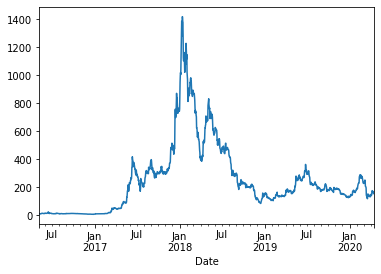

In [24]:
daily_highest.plot()

In [29]:
# Average of Open, high, low, close, volumn based on each week (W)
df.resample("W").mean()

,Open,High,Low,Close,Volume
Date,,,,,
2016-05-15,10.140387,10.310516,10.052387,10.205290,70.896402
2016-05-22,13.042262,13.144048,12.965179,13.066964,242.104139
2016-05-29,12.481012,12.555536,12.385357,12.471012,345.546483
2016-06-05,13.586369,13.651667,13.542202,13.594583,281.854432
2016-06-12,14.287500,14.326190,14.260179,14.297798,309.536737
...,...,...,...,...,...
2020-03-22,124.640952,126.387917,122.802262,124.636012,2618.930260
2020-03-29,133.274762,134.287857,132.255714,133.285893,1374.652289
2020-04-05,137.517083,138.314583,136.791310,137.627440,898.945625


### Resampling on multiple columns using multiple aggregation methods

In [33]:
df.resample("W").agg(
    {"Open":"min", "Close": "mean", "High": "max", "Low": "min", "Volume": "sum"})

,Open,Close,High,Low,Volume
Date,,,,,
2016-05-15,0.00,10.205290,12.00,0.00,10988.942273
2016-05-22,10.06,13.066964,14.77,10.06,40673.495362
2016-05-29,10.41,12.471012,14.43,10.41,58051.809091
2016-06-05,12.41,13.594583,16.05,12.41,47351.544496
2016-06-12,13.83,14.297798,15.75,13.83,52002.171838
...,...,...,...,...,...
2020-03-22,101.06,124.636012,153.17,100.70,439980.283707
2020-03-29,121.89,133.285893,144.14,119.17,230941.584515
2020-04-05,124.50,137.627440,150.32,124.09,151022.864981
